<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [24]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


## Descriptive Statistics on the Boston Housing Prices

In [6]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [7]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


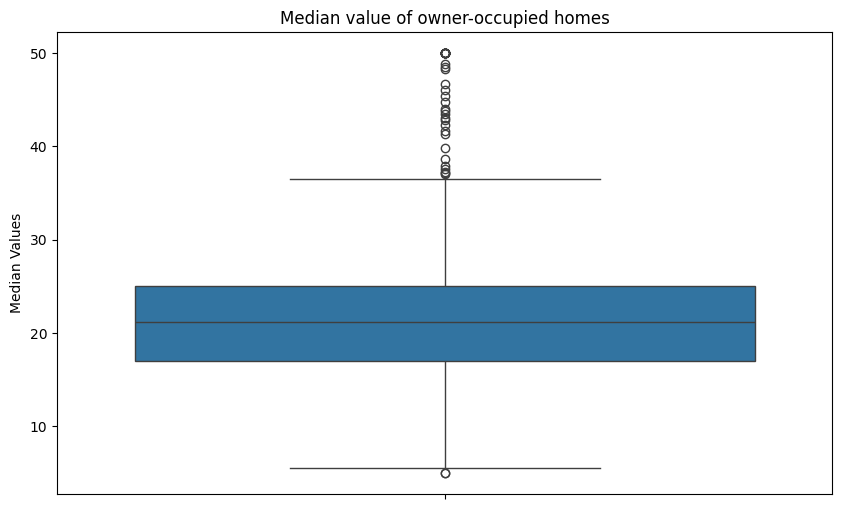

In [12]:
# "Median value of owner-occupied homes" 

plt.figure(figsize=(10,6))
sns.boxplot(data=boston_df, y='MEDV')
plt.title("Median value of owner-occupied homes")
plt.ylabel('Median Values')
plt.show()



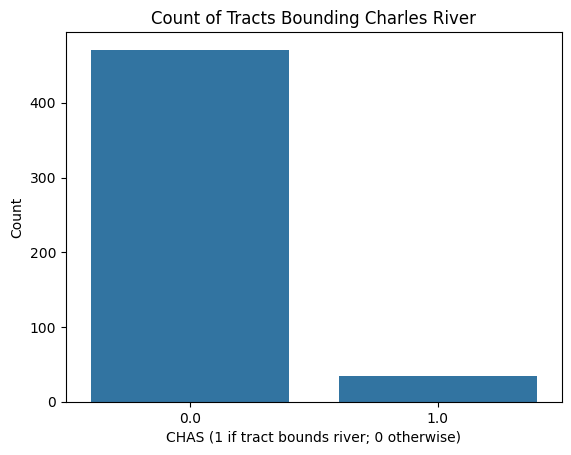

In [17]:
sns.countplot(x='CHAS', data=boston_df)
plt.title('Count of Tracts Bounding Charles River')
plt.xlabel('CHAS (1 if tract bounds river; 0 otherwise)')
plt.ylabel('Count')
plt.show()

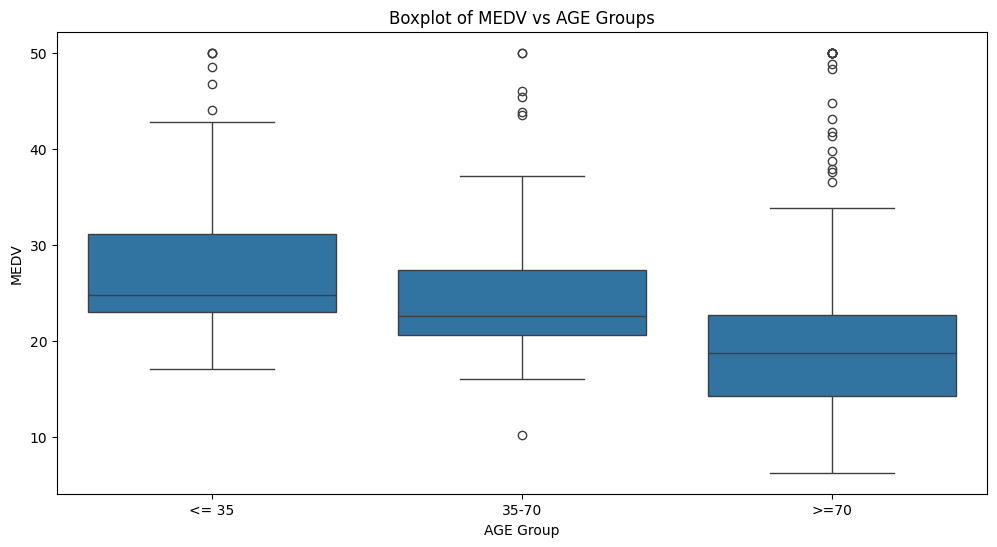

In [18]:
bins = [0,35,70,100]
labels = ['<= 35', '35-70', '>=70']
boston_df['Age_Grp'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(12, 6))
sns.boxplot(x='Age_Grp', y='MEDV', data=boston_df)
plt.title('Boxplot of MEDV vs AGE Groups')
plt.xlabel('AGE Group')
plt.ylabel('MEDV')
plt.show()

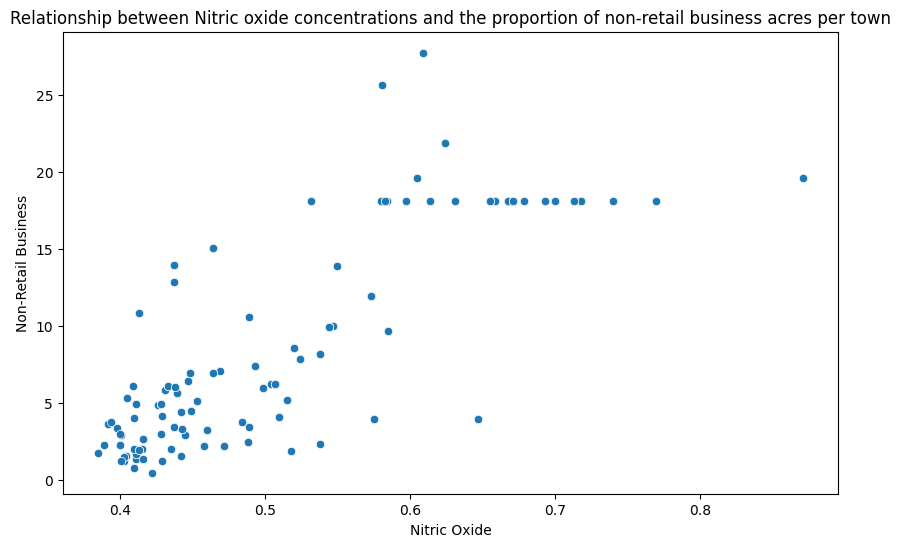

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=boston_df, x='NOX', y='INDUS')
plt.title('Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town')
plt.xlabel('Nitric Oxide')
plt.ylabel('Non-Retail Business')
plt.show()

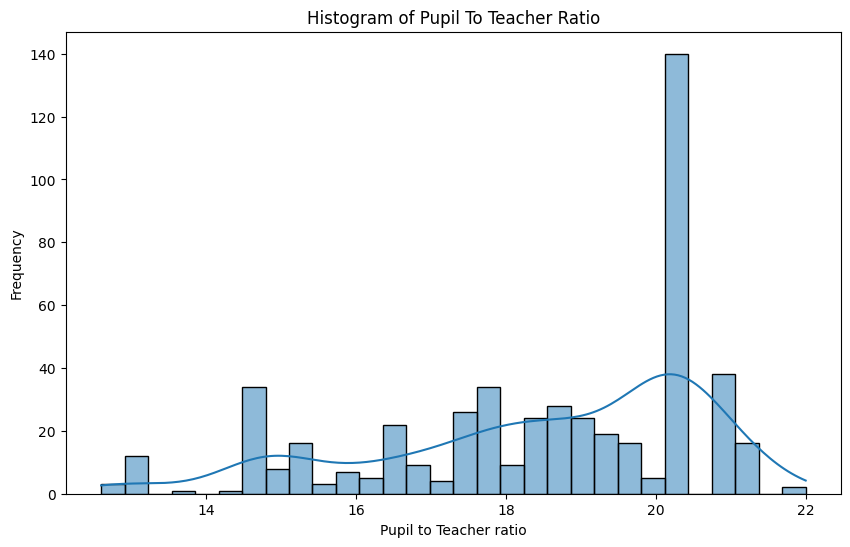

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(data=boston_df, x='PTRATIO', bins=30, kde=True)
plt.title('Histogram of Pupil To Teacher Ratio')
plt.xlabel('Pupil to Teacher ratio')
plt.ylabel('Frequency')
plt.show()

In [37]:
# Null Hypothesis: There is no difference in median value of houses bounded by the Charles river.
# Alternative Hypothesis: There is difference in median value of houses bounded by the Charles river

bounded = boston_df[boston_df['CHAS'] ==1]['MEDV'].tolist()
unbounded = boston_df[boston_df['CHAS'] == 0]['MEDV'].tolist()



t_stat, p_val = stats.ttest_ind(bounded, unbounded)

print("Two-Sample t-Test (Independent)")
print("t-statistic:", t_stat)
print("p-value:", p_val)

print(" ")


if p_val < 0.05:
    print('There is difference in median value of houses bounded by the Charles river!')
else:
    print('There is no difference in median value of houses bounded by the Charles river.!')

Two-Sample t-Test (Independent)
t-statistic: 3.996437466090509
p-value: 7.390623170519905e-05
 
There is difference in median value of houses bounded by the Charles river!


In [38]:
#Null: There is no difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940.
#Alternative: There is a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940.


groups = [boston_df[boston_df['Age_Grp'] == group]['MEDV'] for group in labels]
f_stat, p_value = stats.f_oneway(*groups)

print("ANOVA Results")
print("F-statistic:", f_stat)
print("p-value:", p_value)

print(' ')

if p_val < 0.05:
    print('There is a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940.')
else:
    print('There is no difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940.')

ANOVA Results
F-statistic: 30.566839914861454
p-value: 3.435569235360708e-13
 
There is a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940.


In [32]:
# Calculate Pearson correlation between two columns
corr_coef = boston_df['NOX'].corr(boston_df['INDUS'])

print("Relationship between Nitric oxide concentrations and proportion of non-retail business acres per town:", corr_coef)

Relationship between Nitric oxide concentrations and proportion of non-retail business acres per town: 0.763651446920914


In [34]:
# Define the independent and dependent variables
X = boston_df['DIS']
y = boston_df['MEDV']

# Add a constant to the independent variable (for the intercept)
X = sm.add_constant(X)

# Create the model and fit it
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 07 Aug 2024   Prob (F-statistic):           1.21e-08
Time:                        15:08:09   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

Interpretation: While there is a statistically significant positive relationship between the distance to employment centers and the median home value, the model's low R-squared suggests that other factors not included in this model might be influencing home values.